In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('mushroom_overload.csv', low_memory=False)

In [3]:
print(df.shape)
df.head()

(6723116, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.duplicated().sum()
# No duplicate rows found

np.int64(0)

## Univariate Analysis of Stem height of mushrooms

In [5]:
dat = df["stem-height"]

In [6]:
# We see that there are no null columns
dat.isna().sum()

np.int64(0)

In [7]:
dat.describe()

count    6.723116e+06
mean     6.697878e+00
std      3.300607e+00
min      0.000000e+00
25%      4.710000e+00
50%      6.010000e+00
75%      7.790000e+00
max      3.770000e+01
Name: stem-height, dtype: float64

In [23]:
# Finding IQR 
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)

IQR = Q3 - Q1

# Finding the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('IQR:', IQR)
print('Q1:', Q1)
print('Q3:', Q3)
# Finding the number of outliers

outliers = dat[(dat < lower_bound) | (dat > upper_bound)]

# Multiple outliers found with the IQR method

outliers

Lower Bound: 0.48499999999999854
Upper Bound: 11.565000000000001
IQR: 2.7700000000000005
Q1: 4.64
Q3: 7.41


764        11.81
771        11.66
798        11.60
818        11.64
851        11.70
           ...  
6715327    11.63
6715328    11.84
6715330    12.13
6715339    12.09
6715340    11.57
Name: stem-height, Length: 94571, dtype: float64

In [24]:
print("Number of outliers: ", outliers.shape[0])
print("Percentage of outliers: ", (outliers.shape[0]/dat.shape[0])*100)

Number of outliers:  94571
Percentage of outliers:  1.4883189365926497


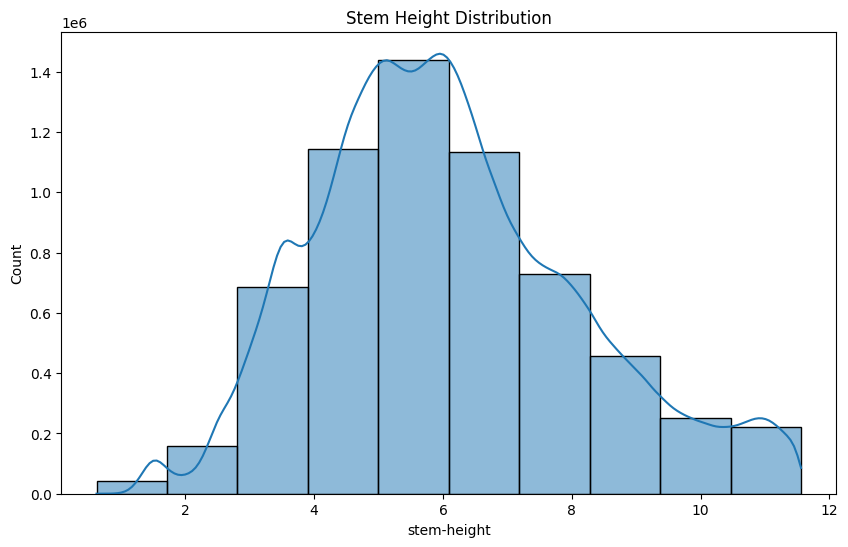

In [27]:
# Plotting the data

plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Stem Height Distribution')
plt.show()
# 

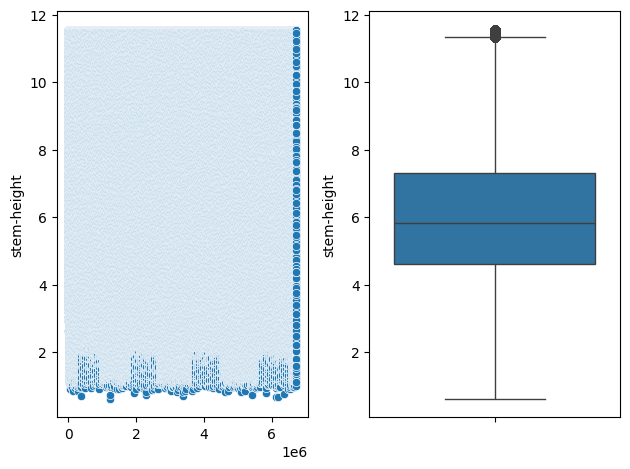

In [26]:
plt.subplot(1, 2, 1)
sns.scatterplot(dat)
plt.subplot(1, 2, 2)
sns.boxplot(dat)
plt.tight_layout()
plt.show()

# Illegilble scatter plot, no data inferable
# Multiple outliers found with the IQR method and the boxplot

(6723116, 2)


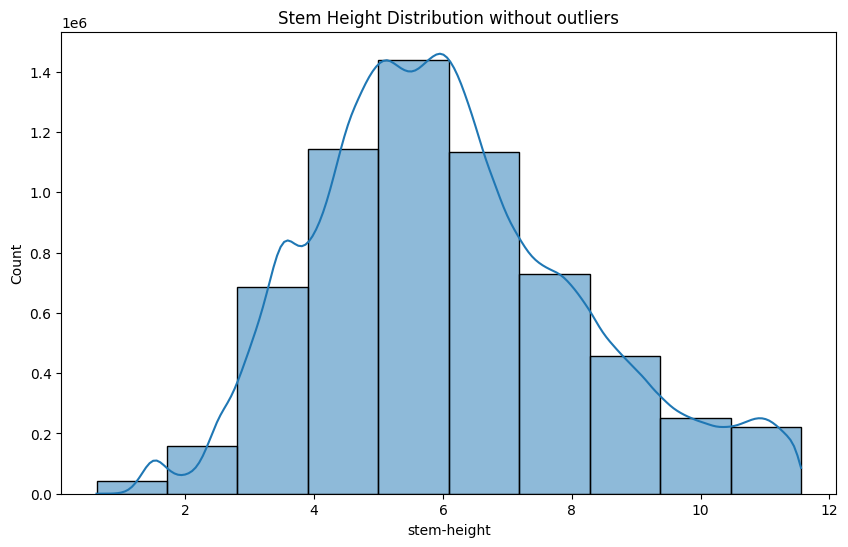

In [25]:
# removing the outliers
dat = dat[(dat > lower_bound) & (dat < upper_bound)]
print(df.shape)

# Plotting the data

plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Stem Height Distribution without outliers')
plt.show()


## Inferences
- The stem height of mushrooms is normally distributed.
- 6.69cm is the average stem height and std dev is low so the data isn't spread out much.
- IQR is 2.77cm

In [14]:
# Z-score method
z_scores = stats.zscore(dat)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print("Number of outliers: ", outliers.sum())
print("Number of outliers: ", np.count_nonzero(outliers))

# No outliers detected using zscores method most likely because the data is normally distributed and all potential outliers have been removed

Number of outliers:  0
Number of outliers:  0


<Axes: xlabel='stem-height', ylabel='Count'>

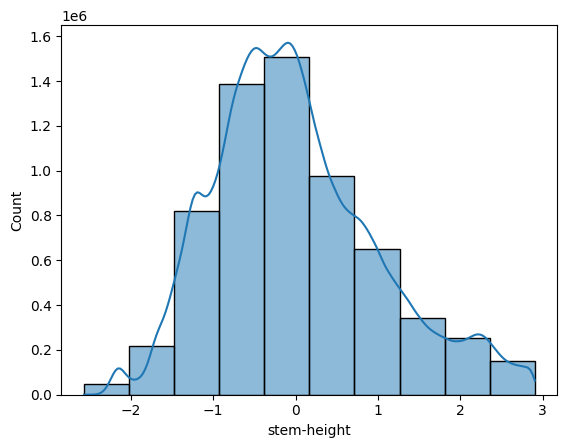

In [15]:
sns.histplot(z_scores, kde=True, bins=10)

## Bivariate Analysis of Cap diameter vs stem height of mushrooms (Numerical vs Numerical)

In [16]:
df = df.loc[:, ['cap-diameter', 'stem-height']]

In [17]:
# Checking for duplicates and missing values
print(df.duplicated())
print(df.isna().sum())

df.describe()

0          False
1          False
2          False
3          False
4          False
           ...  
6723111     True
6723112     True
6723113     True
6723114     True
6723115     True
Length: 6723116, dtype: bool
cap-diameter    0
stem-height     0
dtype: int64


,cap-diameter,stem-height
count,6.723116e+06,6.723116e+06
mean,6.792650e+00,6.697878e+00
std,5.279232e+00,3.300607e+00
min,2.200000e-01,0.000000e+00
25%,3.520000e+00,4.710000e+00
50%,5.960000e+00,6.010000e+00
75%,8.600000e+00,7.790000e+00
max,6.689000e+01,3.770000e+01


In [18]:
# Testing for correlation
df.corr()

,cap-diameter,stem-height
cap-diameter,1.000000,0.420232
stem-height,0.420232,1.000000


In [19]:
# ANOVA testing
f_statistic, p_value = stats.f_oneway(df['cap-diameter'], df['stem-height'])
print('F statistic:', f_statistic)
print('P value:', p_value)

# p value is less than 0.05, we reject the null hypothesis that the two columns are independent
# The two columns depend upon each other.

F statistic: 1557.7526156167505
P value: 0.0


<Axes: xlabel='cap-diameter', ylabel='stem-height'>

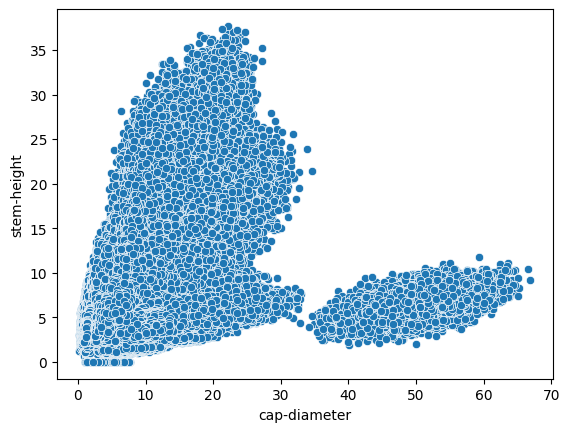

In [20]:
sns.scatterplot(x='cap-diameter', y='stem-height', data=df)

We look at the two clusters formed here and infer that there are two distinct groups of mushrooms- 
1. Mushrooms with a cap-diameter of 0-30 mm and stem height of 0-35 mm
2. Mushrooms with a cap-diameter of 30-65 mm and stem height of 0-10 mm

# Multi-variate Analysis of Cap diameter, stem height and cap color of mushrooms (Numerical vs Numerical vs Categorical)

In [61]:
# Reloading the dataset
df = pd.read_csv('mushroom_overload.csv', low_memory=False)

In [68]:
df = df.loc[:, ['cap-diameter', 'stem-height', 'cap-color']]

In [69]:
df.head()

,cap-diameter,stem-height,cap-color
0,17.18,18.58,0
1,15.30,16.95,0
2,14.94,16.84,1
3,13.37,18.10,0
4,17.23,17.42,0


In [70]:
df.isna().sum()
# No missing values found

cap-diameter    0
stem-height     0
cap-color       0
dtype: int64

In [71]:
df.dtypes

cap-diameter     float64
stem-height      float64
cap-color       category
dtype: object

In [72]:
#converting the cap-color column to category
df['cap-color'] = df['cap-color'].astype('category')

In [73]:
number_of_colours = df['cap-color'].unique()
print(number_of_colours)
print('Number of colours:', len(number_of_colours))

Number of colours: 12


In [74]:
# Encoding the categorial variables according to "number_of_colours"
df['cap-color'] = df['cap-color'].apply(lambda x: np.where(number_of_colours == x)[0][0])
df['cap-color'].value_counts()


cap-color
2     2711535
6      944931
5      838360
0      451605
3      440155
1      390680
4      195766
8      194137
7      187184
9      138449
11     138109
10      92205
Name: count, dtype: int64

In [78]:
sns.heatmap(df, annot=True)

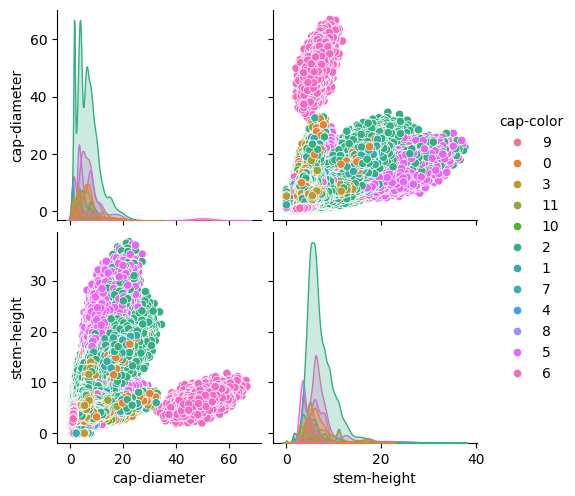

In [77]:
sns.pairplot(df, hue='cap-color')

We observe that cap-colour 6 have distinct stem height and cap diameter values. from the rest of the cap colours.
Most of the mushrooms are concentrated into a similar cluster